In [1]:
import pandas as pd
from model import load_model, preprocess
import torch
import numpy as np

In [2]:
embeddings_df = pd.read_parquet("../parquets/openclip_vit_h_14.parquet")
hord_ratings = pd.read_parquet("../parquets/hord_diffusiondb_scores.parquet")
mixed_diffusion_df = pd.read_parquet("../parquets/prepared_hord_diffusion_dataset.parquet")
df = pd.merge(embeddings_df, mixed_diffusion_df, left_on="image_name", right_on="image_name")

model = load_model("aesthetics_scorer_rating_openclip_vit_h_14.pth").to("cuda")


In [3]:
# Function to apply the model on a single row
def apply_model(row):
    embedding = torch.tensor(row["pooled_output"]).unsqueeze(0).to("cuda")
    embedding = preprocess(embedding)
    with torch.no_grad():
        output = model(embedding)
    return output.item()

# Apply the model on each row
df['predicted_rating'] = df.apply(apply_model, axis=1)

In [11]:
filtered = df
#filtered = filtered[filtered["predicted_rating"] > 8]
filtered = filtered[filtered["rating"] > 8]
filtered = filtered[abs(filtered["rating"] - filtered["predicted_rating"]) > 7]
#filtered[["image_name", "rating", "predicted_rating"]]

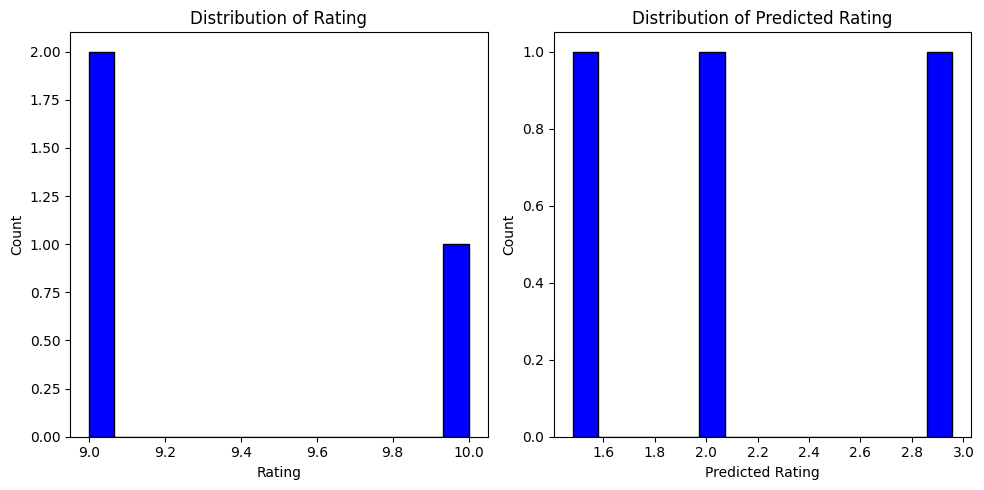

In [12]:
import matplotlib.pyplot as plt

def plot(plot_df):
    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

    # Plot the first histogram on the first subplot
    ax1.hist(plot_df["rating"], bins=15, density=False, color='blue', edgecolor='black')
    ax1.set_xlabel('Rating')
    ax1.set_ylabel('Count')
    ax1.set_title('Distribution of Rating')

    # Plot the second histogram on the second subplot
    ax2.hist(plot_df["predicted_rating"], bins=15, density=False, color='blue', edgecolor='black')
    ax2.set_xlabel('Predicted Rating')
    ax2.set_ylabel('Count')
    ax2.set_title('Distribution of Predicted Rating')

    # Adjust the layout of the subplots
    fig.tight_layout()

    # Show the figure
    plt.show()

plot(filtered)

In [13]:
import ipyplot

images = [f"../dataset/{x}" for x in filtered["image_name"].values]
ipyplot.plot_images(images, img_width=250, max_images=300)
#ipyplot.plot_class_tabs(images, "rating", max_imgs_per_tab=10, img_width=150)
display(images)

['../dataset/09ee4e92-2448-4c4d-9764-ac1430a6d5bd.webp',
 '../dataset/12d51d44-4928-4dba-8022-e7671c9f52ab.webp',
 '../dataset/93fd74dc-1f44-45d9-a590-bcc013a4579f.webp']

In [15]:
pd.set_option('display.max_colwidth', None)
hord_ratings[hord_ratings["id"] =="09ee4e92-2448-4c4d-9764-ac1430a6d5bd"]

,id,ratings_count,rating,kudos,account_age,usage_requests,created_at,client_agent,artifacts,user_id,trusted,validated,captchas_failed,country
165456,09ee4e92-2448-4c4d-9764-ac1430a6d5bd,4,2,543,76169,528,2023-02-06 21:38:42.864756,StableUI:1.0:(discord)aqualxx#5004,5.0,695e1ebaee85aa8b3bc4180a893a999fc385b25de47246de22dfb291d2a156ee,False,False,0,TT
266994,09ee4e92-2448-4c4d-9764-ac1430a6d5bd,4,9,25,58670,854,2023-01-17 14:23:29.155944,ArtBot:v.202301150004:(discord)rockbandit#4910,NaN,4973f64d2b9c24feab8433c7004fb6272e245381b1815164c4026d69c02b5406,False,False,-32,DO
411714,09ee4e92-2448-4c4d-9764-ac1430a6d5bd,4,10,308873,58660,2883,2023-01-19 09:20:09.399812,ArtBot:v.202301190639:(discord)rockbandit#4910,NaN,4655ed98b0444417d6552e0c44c4614cd1d0710e364b8c3608db309a1216903d,False,False,0,US


In [18]:
user = hord_ratings[hord_ratings["user_id"] =="4973f64d2b9c24feab8433c7004fb6272e245381b1815164c4026d69c02b5406"]
def plot(plot_df):
    # Set up the figure with two subplots
    #fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

    # Plot the first histogram on the first subplot
    ax1.hist(plot_df["rating"], bins=10, density=False, color='blue', edgecolor='black')
    ax1.set_xlabel('Rating')
    ax1.set_ylabel('Count')
    ax1.set_title('Distribution of Rating')

    # Plot the second histogram on the second subplot
    ax2.hist(plot_df["artifacts"], bins=5, density=False, color='blue', edgecolor='black')
    ax2.set_xlabel('Artifacts')
    ax2.set_ylabel('Rating')
    ax2.set_title('Distribution of Artifacts')

    # Adjust the layout of the subplots
    fig.tight_layout()

    # Show the figure
    plt.show()

plot(user)

KeyError: 'user_id'